# PROGETTO DI METODI INFORMATICI PER LA GESTIONE AZIENDALE:                        RECOMMENDER SYSTEM

# 1.  ANALISI ESPLORATIVA

## Statistiche descrittive

Calcolo alcune statistiche descrittive per trarre conclusioni sull'intera popolazione statistica

In [1]:
# importo alcune librerie
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
#scarico la libreria Surprise basata su scikit-learn per costruire e analizzare il recommender system

In [3]:
conda install -c conda-forge scikit-surprise

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install plotly

In [2]:
from surprise import Dataset, Reader
from surprise import KNNBasic
from surprise import SVD
from surprise.model_selection import cross_validate


In [3]:
from pandas import plotting
plt.style.use('ggplot')

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import os

In [7]:
#Leggo e visualizzo i dati importati, nominandoli: data, item, user
columns =  ['user_id' , 'movie_id' , 'rating' , 'timestamp']
data = pd.read_csv('u.data', sep='\t', names=columns)
data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
data.tail()

,user_id,movie_id,rating,timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


In [9]:
data.sample()

,user_id,movie_id,rating,timestamp
14675,385,56,5,879441728


In [10]:
columns_item=['movie_id' , 'movie_title' , 'release_date' , 'video_release_date' ,
              'IMDb_URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Children\'s' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western']
item = pd.read_csv('u.item', sep='|', names=columns_item, encoding='latin1')
item.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
item.tail(3)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1681,1682,Scream of Stone (Schrei aus Stein) (1991),08-Mar-1996,NaN,http://us.imdb.com/M/title-exact?Schrei%20aus%...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
item.sample()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1336,1337,Larger Than Life (1996),01-Nov-1996,NaN,http://us.imdb.com/M/title-exact?Larger%20Than...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
columns_user =  ['user_id' , 'age' , 'sex' , 'job' , 'zip_code']
user = pd.read_csv('u.user', sep='|', names=columns_user)
user.head()

,user_id,age,sex,job,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [14]:
user.tail()

,user_id,age,sex,job,zip_code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [15]:
user.sample()

,user_id,age,sex,job,zip_code
755,756,30,F,none,90247


In [16]:
type(data)

pandas.core.frame.DataFrame

In [17]:
data.dtypes

user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object

In [18]:
#conto i valori nulli 
data.isnull().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [19]:
item.isnull().sum()

movie_id                 0
movie_title              0
release_date             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [20]:
user.isnull().sum()

user_id     0
age         0
sex         0
job         0
zip_code    0
dtype: int64

In [21]:
#tipi di dati
user.dtypes

user_id      int64
age          int64
sex         object
job         object
zip_code    object
dtype: object

In [22]:
data.info

<bound method DataFrame.info of        user_id  movie_id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>

In [23]:
item.info

<bound method DataFrame.info of       movie_id                                movie_title release_date  \
0            1                           Toy Story (1995)  01-Jan-1995   
1            2                           GoldenEye (1995)  01-Jan-1995   
2            3                          Four Rooms (1995)  01-Jan-1995   
3            4                          Get Shorty (1995)  01-Jan-1995   
4            5                             Copycat (1995)  01-Jan-1995   
...        ...                                        ...          ...   
1677      1678                          Mat' i syn (1997)  06-Feb-1998   
1678      1679                           B. Monkey (1998)  06-Feb-1998   
1679      1680                       Sliding Doors (1998)  01-Jan-1998   
1680      1681                        You So Crazy (1994)  01-Jan-1994   
1681      1682  Scream of Stone (Schrei aus Stein) (1991)  08-Mar-1996   

      video_release_date                                           IMDb_URL  \


In [24]:
item.dtypes

movie_id                int64
movie_title            object
release_date           object
video_release_date    float64
IMDb_URL               object
unknown                 int64
Action                  int64
Adventure               int64
Animation               int64
Children's              int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
Film-Noir               int64
Horror                  int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Thriller                int64
War                     int64
Western                 int64
dtype: object

In [25]:
user.info

<bound method DataFrame.info of      user_id  age sex            job zip_code
0          1   24   M     technician    85711
1          2   53   F          other    94043
2          3   23   M         writer    32067
3          4   24   M     technician    43537
4          5   33   F          other    15213
..       ...  ...  ..            ...      ...
938      939   26   F        student    33319
939      940   32   M  administrator    02215
940      941   20   M        student    97229
941      942   48   F      librarian    78209
942      943   22   M        student    77841

[943 rows x 5 columns]>

In [26]:
#statistiche descrittive
data.describe()

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [27]:
item.describe()

,movie_id,video_release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
user.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [29]:
#dimensioni righe-colonne dei dataframe
print('Data_shape: ', data.shape)
print('Item_shape: ', item.shape)
print('User_shape: ', user.shape)

Data_shape:  (100000, 4)
Item_shape:  (1682, 24)
User_shape:  (943, 5)


C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



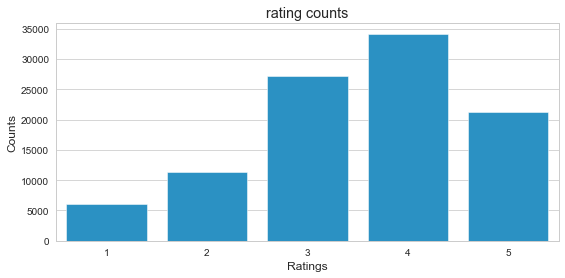

In [30]:
# rating counts
plt.rcParams['figure.figsize'] = (9, 4)
sns.set_style("whitegrid")
sns.countplot(data.rating,palette=['#19d'])
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.rcParams.update({'font.size': 10})
plt.title("rating counts")
plt.show();


In [31]:
#conto i voti per avere numeri precisi
data.rating.value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

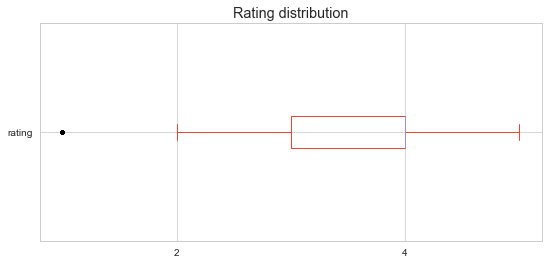

In [32]:
#boxplot distribuzione dei voti
data.rating.plot.box(vert=False, sym='k.')
plt.title('Rating distribution')
plt.rcParams.update({'font.size': 40})

In [33]:
#età medie maschi femmine
print(round(user.groupby('sex').age.mean(), 1))

sex
F    33.8
M    34.1
Name: age, dtype: float64


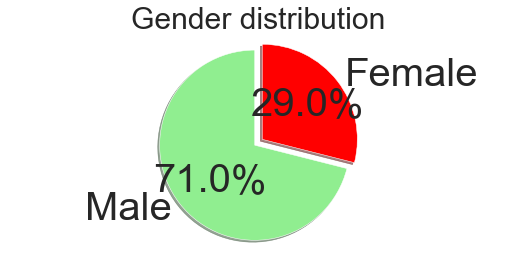

In [34]:
# Gender distribution
labels = ['Male', 'Female']
sizes = user.sex.value_counts()
colors = ['lightgreen', 'red']
explode = [0, 0.1]

plt.pie(sizes, colors= colors, labels=labels, explode=explode, autopct='%.1f%%',
        shadow=True, startangle=90)
plt.title("Gender distribution", fontsize=30)
plt.axis("equal")
plt.rcParams.update({'font.size': 15})
plt.show()


In [35]:
#conteggio degli utenti per genere
user['sex'].value_counts()

M    670
F    273
Name: sex, dtype: int64

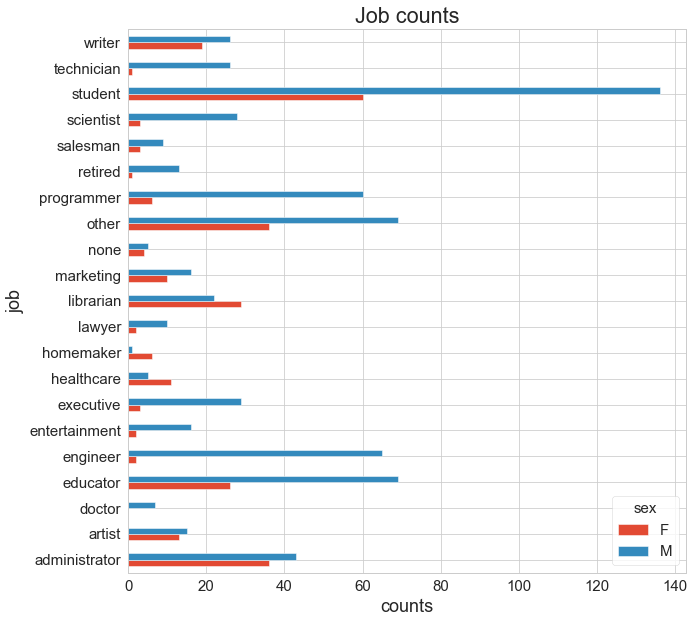

In [36]:
# job counts
user_segment_job = user.groupby(['job'])
user_segment_job['sex'].value_counts().unstack().plot(
        kind='barh',
    figsize=(10, 10)
    )
plt.xlabel('counts')
plt.title("Job counts")
plt.rcParams.update({'font.size': 10})

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



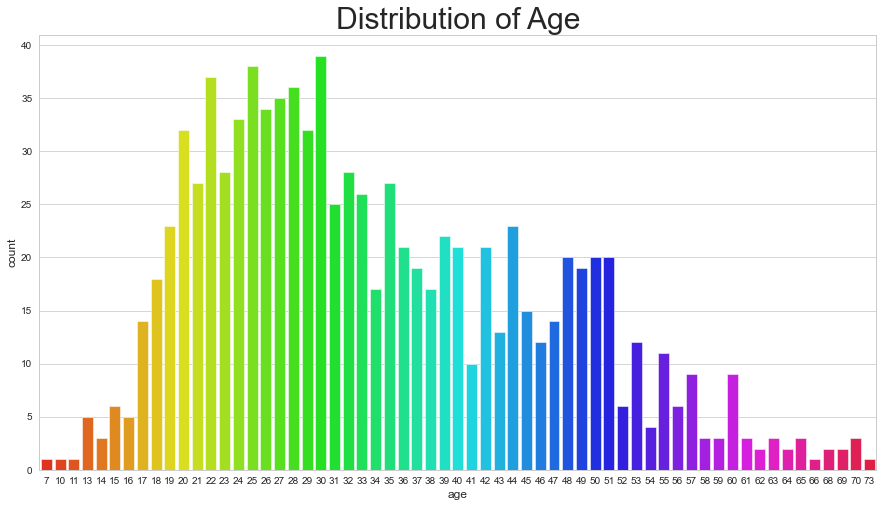

In [37]:
#Age distribution
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(user['age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 30)
plt.show()

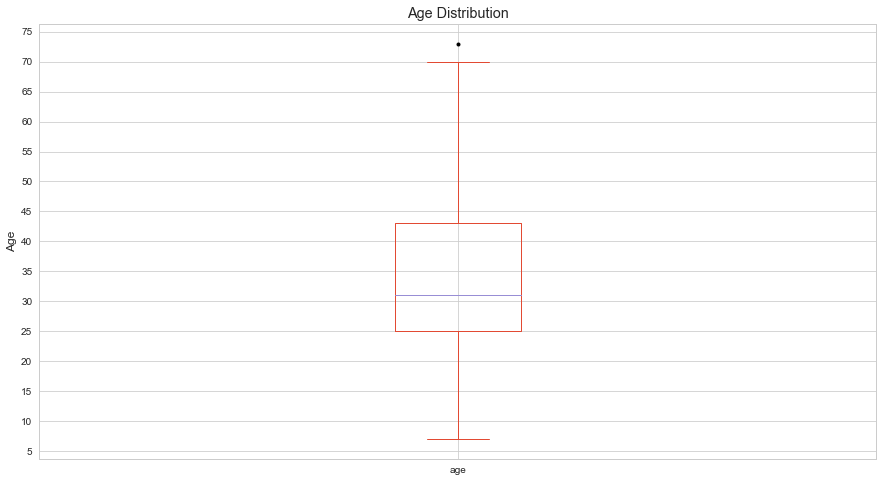

In [38]:
user.age.plot.box(vert=True, sym='k.')
plt.title('Age Distribution')
plt.ylabel('Age')
plt.yticks(np.arange(5, 80, step=5))
plt.autoscale()
plt.rcParams.update({'font.size': 12})

In [39]:
#unisco i dataframe
frames=[data, user]
result=pd.merge(data, user, on=["user_id"])
result.head()

,user_id,movie_id,rating,timestamp,age,sex,job,zip_code
0,196,242,3,881250949,49,M,writer,55105
1,196,393,4,881251863,49,M,writer,55105
2,196,381,4,881251728,49,M,writer,55105
3,196,251,3,881251274,49,M,writer,55105
4,196,655,5,881251793,49,M,writer,55105


In [40]:
#rating dell'utente 1 ai primi 20 film
data.groupby(['user_id', 'movie_id']).rating.mean().head(20)

user_id  movie_id
1        1           5.0
         2           3.0
         3           4.0
         4           3.0
         5           3.0
         6           5.0
         7           4.0
         8           1.0
         9           5.0
         10          3.0
         11          2.0
         12          5.0
         13          5.0
         14          5.0
         15          5.0
         16          5.0
         17          3.0
         18          4.0
         19          5.0
         20          4.0
Name: rating, dtype: float64

In [41]:
#voti più ricorrenti dei primi dieci utenti
data.groupby('user_id').rating.median().head(10)

user_id
1     4.0
2     4.0
3     3.0
4     5.0
5     3.0
6     4.0
7     4.0
8     4.0
9     4.0
10    4.0
Name: rating, dtype: float64

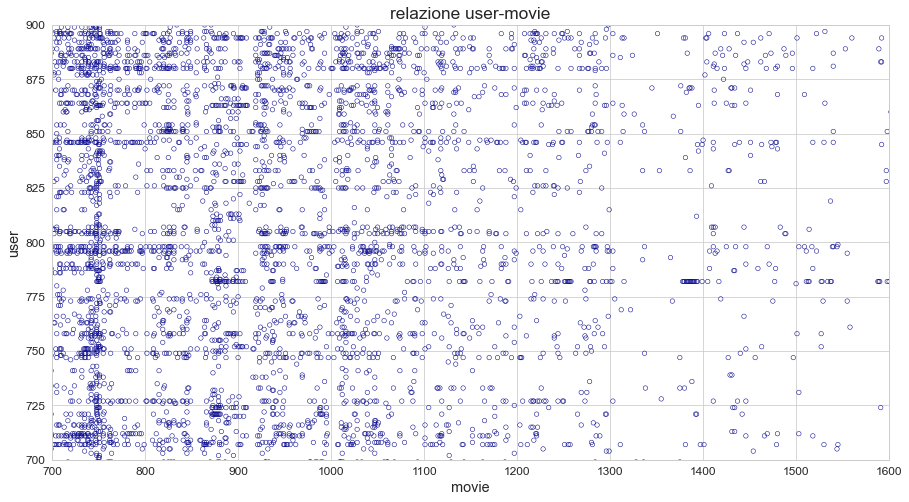

In [42]:
#i primi film sono più votati
data.plot(kind='scatter', x='movie_id', y='user_id',
c='none', edgecolor='darkblue', xlim=[700, 1600], ylim=[700, 900])
plt.plot([15, 55], [data.user_id.mean(), data.user_id.mean()], 'k:')
plt.plot([data.movie_id.mean(), data.movie_id.mean()], [500, 900], 'k:')
plt.title('relazione user-movie')
plt.xlabel('movie')
plt.ylabel('user');

In [43]:
#analisi di correlazione poco significativa
data.corr()

,user_id,movie_id,rating,timestamp
user_id,1.000000,0.010377,-0.009371,0.019082
movie_id,0.010377,1.000000,-0.189124,0.041867
rating,-0.009371,-0.189124,1.000000,-0.012003
timestamp,0.019082,0.041867,-0.012003,1.000000


In [44]:
user.corr()

,user_id,age
user_id,1.000000,0.003181
age,0.003181,1.000000


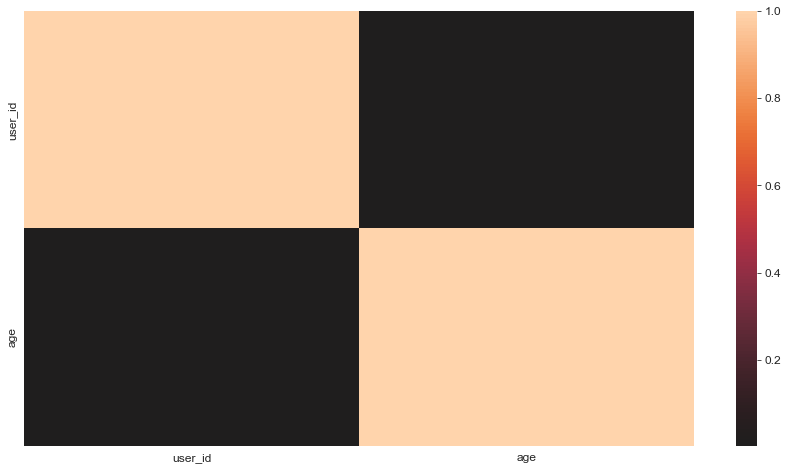

In [45]:
sns.heatmap(user.corr(), center = 0);

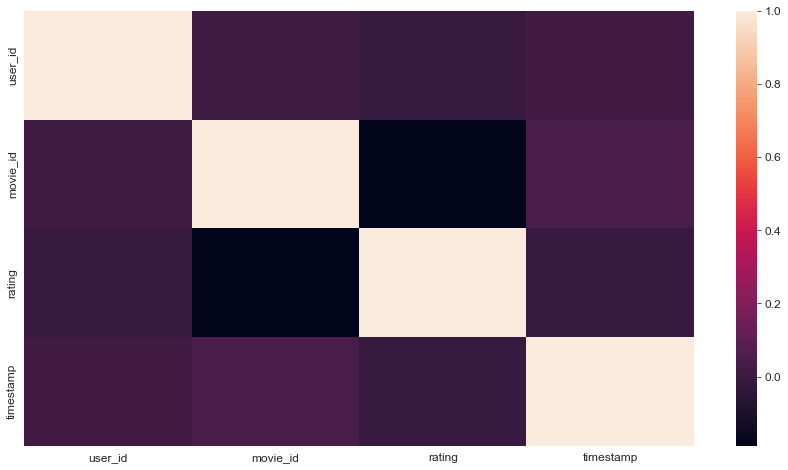

In [46]:
sns.heatmap(data.corr());

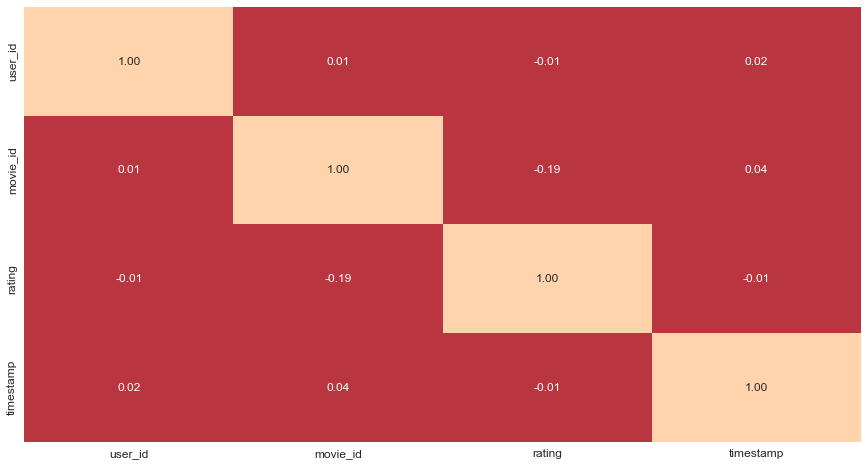

In [47]:
sns.heatmap(data.corr(),
           vmin=0.3, vmax=0.6, center=0, annot=True, fmt='.2f',
           cbar=False);

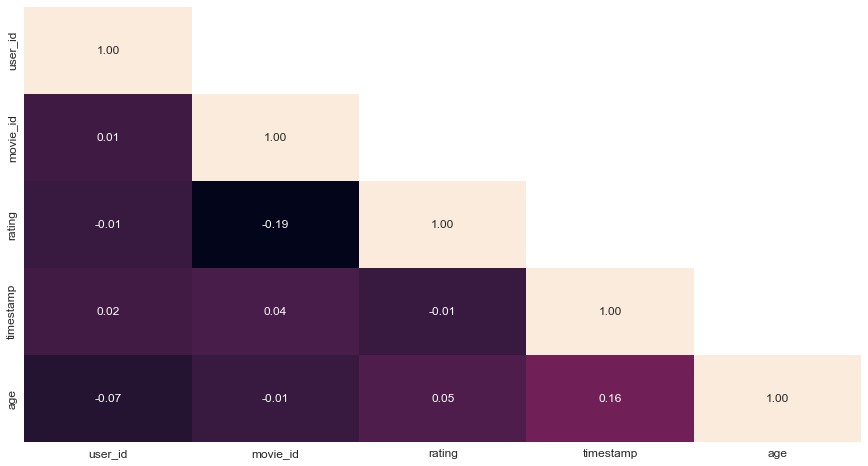

In [48]:
result_corr = result.corr()
sns.heatmap(result_corr, annot=True, fmt=".2f",
mask=~np.tri(result_corr.shape[0], dtype=bool),
cbar=False);

# 2. FILLING DELLA MATRICE DI RATING

Ora passo al filling della matrice di rating con l'algoritmo knn usando la cosine similarity come misura della somiglianza.
Divido la matrice di rating in train e test set; 
Alleno l'algoritmo per il filling della matrice usando il train set per poi effettuare le predizioni sul test set;
Valuto le performance dell'algoritmo

In [49]:
reader = Reader(rating_scale=(1, 5))
dataset1 = Dataset.load_from_df(data[['user_id', 'movie_id', 'rating']], reader)

In [50]:
mat_rat = data.pivot(index='user_id', columns='movie_id', values='rating') 
mat_rat.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(dataset1, test_size=0.20) #suddivisione del dataset in train(80%) e test set(20%)

sim_options = {'name': 'cosine',
               'user_based': True  
               }
algo = KNNBasic(sim_options=sim_options) #inizializzazione e allenamento dell'algoritmo di filling sul trainset
algo.fit(trainset);


Computing the cosine similarity matrix...
Done computing similarity matrix.


In [52]:
from surprise import accuracy

In [53]:
#guardo una predizione
algo.predict(uid=1, iid=2)

Prediction(uid=1, iid=2, r_ui=None, est=3.2000812013144775, details={'actual_k': 40, 'was_impossible': False})

In [54]:
#riempio la matrice dei rating
for index in range(mat_rat.shape[0]):
    for columns in range(mat_rat.shape[1]):
        if np.isnan(mat_rat.iat[index, columns]):
            mat_rat.iat[index, columns] = algo.predict(uid = index,iid = columns).est  

In [55]:
#correggo i valori della matrice poichè le valutazioni sono numeri interi [1,5]
mat_rat = round(mat_rat)

In [56]:
#visualizzo le prime righe della matrice di rating
mat_rat.head() 

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,4.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,2.0,...,2.0,4.0,4.0,4.0,2.0,3.0,1.0,3.0,4.0,3.0
3,4.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,...,2.0,4.0,4.0,4.0,2.0,3.0,1.0,3.0,4.0,3.0
4,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,...,2.0,4.0,4.0,4.0,2.0,3.0,1.0,3.0,4.0,3.0
5,4.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,...,2.0,4.0,4.0,4.0,2.0,3.0,1.0,3.0,4.0,3.0


In [57]:
mat_rat.tail() 

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
939,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,5.0,4.0,...,2.0,4.0,4.0,4.0,2.0,3.0,1.0,3.0,4.0,3.0
940,4.0,4.0,3.0,2.0,4.0,3.0,4.0,5.0,3.0,4.0,...,2.0,4.0,4.0,4.0,2.0,3.0,1.0,3.0,4.0,3.0
941,5.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,...,2.0,4.0,4.0,4.0,2.0,3.0,1.0,3.0,4.0,3.0
942,4.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,...,2.0,4.0,4.0,4.0,2.0,3.0,1.0,3.0,4.0,3.0
943,4.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,...,2.0,4.0,4.0,4.0,2.0,3.0,1.0,3.0,4.0,3.0


In [58]:
mat_rat.isnull().sum()

movie_id
1       0
2       0
3       0
4       0
5       0
       ..
1678    0
1679    0
1680    0
1681    0
1682    0
Length: 1682, dtype: int64

In [59]:
mat_rat.iat[0,0]

5.0

# 3.  CALCOLO DELLE METRICHE DI PERFORMANCE DELL'ALGORITMO K-NN (MSE e RMSE)

Uso la crossvalidation con 5 fold, utile per un bilanciamento significativo tra train e test set:
divido il dataset in 5 fold della stessa dimensione e valuto 5 volte l'accuratezza (RMSE e MSE) usando un fold per il test set e 4 fold come train set. Ottengo 5 osservazioni dell'accuratezza e la stimo facendo la media. La varianza dimiuisce all'aumentare del numero di fold.

In [60]:
# Con la crossvalidation 5 fold
cross_validate(algo, dataset1, measures=['RMSE', 'MSE'], cv=5, verbose=True)
#ottengo 5 osservazioni dell'accuratezza e la stimo facendo la media

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0213  1.0229  1.0135  1.0145  1.0082  1.0161  0.0054  
MSE (testset)     1.0430  1.0464  1.0272  1.0291  1.0165  1.0325  0.0109  
Fit time          1.51    1.53    1.51    1.57    1.78    1.58    0.10    
Test time         3.16    2.88    3.83    2.85    2.84    3.11    0.38    


{'test_rmse': array([1.021297  , 1.02291561, 1.01351264, 1.01446875, 1.00822693]),
 'test_mse': array([1.04304756, 1.04635634, 1.02720788, 1.02914685, 1.01652154]),
 'fit_time': (1.5069377422332764,
  1.5333006381988525,
  1.508967638015747,
  1.5702307224273682,
  1.7772488594055176),
 'test_time': (3.1615521907806396,
  2.875269889831543,
  3.8307621479034424,
  2.8533713817596436,
  2.840451717376709)}

# 4. Segmentazione degli utenti in base alle preferenze: algoritmo di clustering K-MEANS con cosine similarity. Visualizzazione dei cluster attraverso metodi visti a lezione

Trovo il numero di k cluster ottimale attraverso il metodo del gomito. 

In [61]:
# dimensione righe-colonne della matrice
x = mat_rat.iloc[:, :].values
print(x.shape)

(943, 1682)


In [62]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


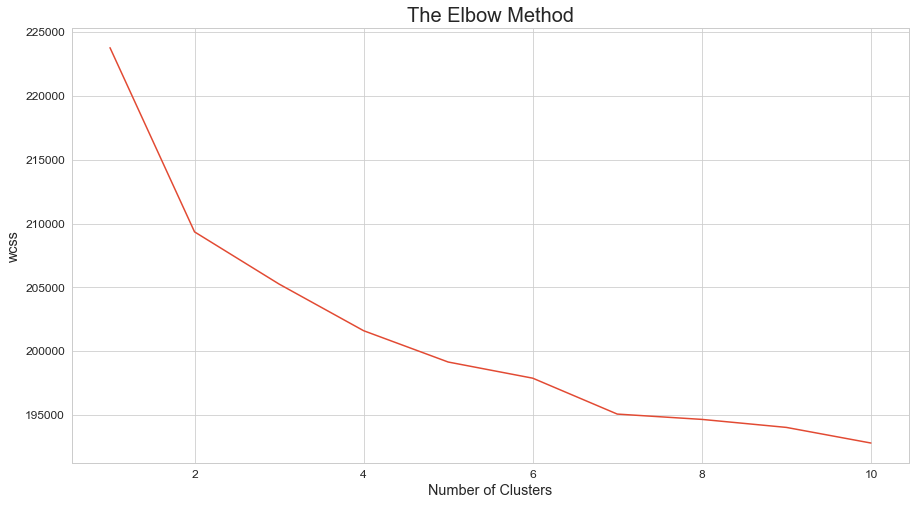

In [63]:
#metodo del gomito
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
      
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [64]:
km = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 12, random_state = 0)

In [65]:
y_means = km.fit_predict(x)

In [66]:
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [67]:
#silhouette [-1, +1]  per valutare bontà del cluster
kmeans_model = KMeans(n_clusters = 7, random_state = 1).fit(x)
labels = kmeans_model.labels_
metrics.silhouette_score(x, labels, metric='cosine')

0.06553218954926944

In [68]:
N_CLUSTER = 7


In [69]:
data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [88]:

#kmeans con cosine
import nltk 
from nltk.cluster import KMeansClusterer
from sklearn.cluster import KMeans
kclusterer = KMeansClusterer(N_CLUSTER, distance=nltk.cluster.util.cosine_distance, repeats=45)
assigned_clusters = kclusterer.cluster(mat_rat.to_numpy(), assign_clusters=True)
#print(assigned_clusters) potrei stamparli
len(assigned_clusters)

943

In [89]:
mat_rat['clusters'] = assigned_clusters

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



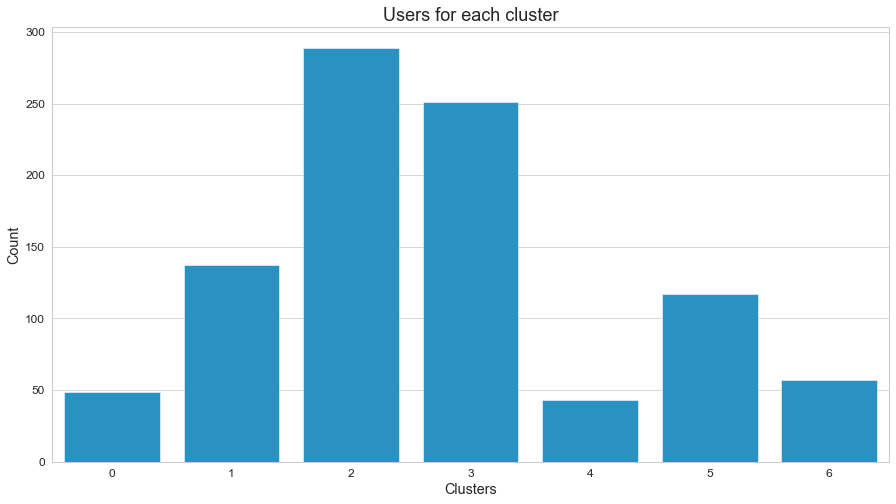

In [90]:
#visualizzazione dei cluster
sns.set_style("whitegrid")
sns.countplot(assigned_clusters, palette = ['#19d'])
plt.title('Users for each cluster', fontsize = 18)
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()

# ANALISI AGGIUNTIVA:
## 3. Filling della matrice di rating attraverso l’algoritmo K-NN usando la correlazione di Pearson oltre alla cosine similarity e confrontare i risultati ottenuti in termini di MSE e RMSE.

In [73]:
dataset2 = Dataset.load_from_df(data[['user_id', 'movie_id', 'rating']], reader)

In [74]:
mat_rat_p = data.pivot(index='user_id', columns='movie_id', values='rating') 

In [75]:
from surprise.model_selection import train_test_split
trainset2, testset2 = train_test_split(dataset2, test_size=0.20)

sim_options = {'name': 'pearson',
               'user_based': True  # compute  similarities between items
               }
algo2 = KNNBasic(sim_options=sim_options)
algo2.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [76]:
round(algo2.predict(uid=1, iid=1).est)

4

In [77]:
for index in range(mat_rat_p.shape[0]):
    for columns in range(mat_rat_p.shape[1]):
        if np.isnan(mat_rat_p.iat[index, columns]):
            mat_rat_p.iat[index, columns]=round(algo2.predict(uid=index,iid=columns).est, 0)  

In [78]:
mat_rat_p = round(mat_rat_p)

In [79]:
mat_rat_p.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,2.0,...,2.0,4.0,4.0,4.0,2.0,3.0,1.0,3.0,4.0,3.0
3,4.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,...,2.0,4.0,4.0,4.0,2.0,3.0,1.0,3.0,4.0,3.0
4,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0,...,2.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0
5,4.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0,...,2.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0


In [80]:
algo2.predict(uid=1,iid=2)

Prediction(uid=1, iid=2, r_ui=None, est=3.2419677014424044, details={'actual_k': 40, 'was_impossible': False})

In [81]:
#performance con Pearson
cross_validate(algo2, dataset2, measures=['RMSE', 'MSE'], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0139  1.0095  1.0121  1.0150  1.0089  1.0119  0.0024  
MSE (testset)     1.0280  1.0191  1.0243  1.0302  1.0179  1.0239  0.0048  
Fit time          2.12    2.02    2.03    2.21    2.00    2.08    0.08    
Test time         2.85    2.73    2.76    2.99    2.75    2.81    0.10    


{'test_rmse': array([1.01389526, 1.00952928, 1.012074  , 1.01500772, 1.00889379]),
 'test_mse': array([1.0279836 , 1.01914937, 1.02429378, 1.03024067, 1.01786667]),
 'fit_time': (2.1248831748962402,
  2.0185000896453857,
  2.028968334197998,
  2.214083671569824,
  2.0020055770874023),
 'test_time': (2.847637176513672,
  2.7278921604156494,
  2.76139760017395,
  2.986685037612915,
  2.7496514320373535)}

In [82]:
#confronto risultati ma questo l'avevo gia fatto
# Tempistiche con cosine similarity
cross_validate(algo, dataset1, measures=['RMSE', 'MSE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0170  1.0176  1.0212  1.0108  1.0196  1.0172  0.0035  
MSE (testset)     1.0343  1.0355  1.0428  1.0218  1.0395  1.0348  0.0071  
Fit time          1.51    1.49    1.52    1.51    1.49    1.50    0.01    
Test time         2.72    3.09    2.89    2.90    2.90    2.90    0.12    


{'test_rmse': array([1.01701024, 1.01757198, 1.02117453, 1.0108425 , 1.01955527]),
 'test_mse': array([1.03430983, 1.03545273, 1.04279742, 1.02180256, 1.03949295]),
 'fit_time': (1.507185935974121,
  1.4918885231018066,
  1.515430212020874,
  1.5142266750335693,
  1.4894204139709473),
 'test_time': (2.724760055541992,
  3.088554620742798,
  2.885251760482788,
  2.897294044494629,
  2.9032063484191895)}

In [83]:
#confronto metriche di performance dell'algoritmo knn con Surprise
predictions2 = algo2.test(testset2)
print('accuracy con Surprise e Pearson:')
accPr = accuracy.rmse(predictions2)
accP = accuracy.mse(predictions2)

predictions = algo.test(testset)
print('accuracy con Surprise e cosine similarity:')
accCr = accuracy.rmse(predictions)
accC = accuracy.mse(predictions)

accuracy con Surprise e Pearson:
RMSE: 0.8222
MSE: 0.6760
accuracy con Surprise e cosine similarity:
RMSE: 0.9244
MSE: 0.8544
